# Supermarket Product Analysis

### **Objective**

1. To Explore Datasets and produce the insights on sales of chips.
2. To understand trends and pattern for different catagories in dataset.
3. Analysis of different customer segments and their contribution to chips sales.
4. Finding Packet size and brand which customer prefer.
5. To produce Stratagic recommendation based on data.

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Importing the Transaction and PurchaseBehaviour Dataset

In [10]:
trans_df = pd.read_csv(r"D:\DBDA\Projects\project 2\Transactions.csv")

In [11]:
purchasebehav_df = pd.read_csv(r"D:\DBDA\Projects\project 2\PurchaseBehaviour.csv")

### Checking whether Transaction Dataset is uploaded properly

In [12]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Checking whether PurchaseBehaviour Dataset is uploaded properly

In [13]:
purchasebehav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Checking General Information Of Transaction Dataset

In [14]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Renaming PREMIUM_CUSTOMER column as CUSTOMER_SEG in PurchaseBehaviour Dataset for better analysis

In [15]:
purchasebehav_df.rename(columns={'PREMIUM_CUSTOMER':'CUSTOMER_SEG'}, inplace=True)

In [16]:
purchasebehav_df['LIFESTAGE']=purchasebehav_df['LIFESTAGE'].str.title()

In [17]:
purchasebehav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,CUSTOMER_SEG
0,1000,Young Singles/Couples,Premium
1,1002,Young Singles/Couples,Mainstream
2,1003,Young Families,Budget
3,1004,Older Singles/Couples,Mainstream
4,1005,Midage Singles/Couples,Mainstream


### Checking General Information Of PurchaseBehaviour Dataset

In [18]:
purchasebehav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LYLTY_CARD_NBR  72637 non-null  int64 
 1   LIFESTAGE       72637 non-null  object
 2   CUSTOMER_SEG    72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Checking for Null values in the Datasets:

In [19]:
#Transaction Dataset
trans_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [20]:
#Purchase Dataset
purchasebehav_df.isna().sum()

LYLTY_CARD_NBR    0
LIFESTAGE         0
CUSTOMER_SEG      0
dtype: int64

### Observations of Transaction Dataset

1. Total no of rows are 264836
2. Total no of columns are 8
3. There are no null values in the Dataset. 
4. Date format is int64 which needs to be changed to date format.
5. We need to convert following columns (STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME) into Uncategorised data as we will    not perform any numeric operations on these columns.
6. PROD_QTY, TOT_SALES are in int format.


### Observations of Purchase Behaviour Dataset

1. Total no of rows are 72637
2. Total no of columns are 3
3. There are no null values.
4. We need to convert column LYLTY_CARD_NBR into Uncategorised data as we will not perform any numeric operations on this          column.


In [21]:
#checking for duplicates in Transaction Dataset
trans_df[trans_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [22]:
#checking for duplicates in PurchaseBehaviour Dataset
purchasebehav_df[purchasebehav_df.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,CUSTOMER_SEG


### Observations:
1. One Duplicate is found in Transaction Dataset.
2. No Duplicate is found in PurchaseBehaviour Dataset.


In [23]:
#Removing duplicates
trans_df.drop(index=124845,inplace=True)

In [24]:
#checking for results
trans_df[trans_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [25]:
#Converting dates to datetime in pandas:
def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + num - 2)
    return dt

In [26]:
#Applying the function on the date column of Transactions Dataset:
trans_df['DATE'] = trans_df['DATE'].apply(convert_to_datetime)
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [27]:
#Ammending data types:
trans_df['STORE_NBR']=trans_df['STORE_NBR'].astype(str)
trans_df['LYLTY_CARD_NBR']=trans_df['LYLTY_CARD_NBR'].astype(str)
trans_df['TXN_ID']=trans_df['TXN_ID'].astype(str)
trans_df['PROD_NBR']=trans_df['PROD_NBR'].astype(str)
trans_df['PROD_NAME']=trans_df['PROD_NAME'].astype(str)
purchasebehav_df['LYLTY_CARD_NBR']=purchasebehav_df['LYLTY_CARD_NBR'].astype(str)

### Checking for consistency of values in Categorical columns:

In [28]:
# Collecting the categorical columns of Transacion Dataset into  list
trans_col=[]
for x in trans_df.dtypes.index:
    if trans_df.dtypes[x]=='object':
        trans_col.append(x)
trans_col

['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME']

In [29]:
#checking for consistency of values in categorical columns mentioned in the previous list
for col in trans_col:
    print(col)
    print(trans_df[col].unique())
    print()
    print('*******')
    print()

STORE_NBR
['1' '2' '4' '5' '7' '8' '9' '13' '19' '20' '22' '23' '25' '33' '36' '38'
 '39' '41' '43' '45' '51' '54' '55' '56' '58' '59' '60' '62' '63' '67'
 '71' '72' '74' '75' '80' '81' '82' '83' '84' '88' '94' '96' '97' '101'
 '102' '104' '106' '109' '110' '111' '112' '114' '115' '116' '118' '119'
 '120' '122' '125' '128' '129' '130' '133' '149' '151' '152' '153' '156'
 '157' '160' '161' '164' '166' '167' '168' '169' '172' '173' '175' '178'
 '181' '184' '186' '187' '191' '194' '196' '197' '200' '205' '207' '208'
 '209' '212' '214' '215' '216' '217' '219' '222' '223' '225' '226' '227'
 '235' '236' '237' '241' '243' '246' '247' '248' '250' '253' '255' '256'
 '257' '262' '265' '266' '269' '271' '77' '3' '6' '10' '12' '15' '16' '17'
 '18' '21' '24' '26' '27' '28' '29' '30' '32' '34' '35' '37' '40' '46'
 '47' '48' '49' '50' '52' '53' '57' '61' '64' '65' '66' '68' '69' '70'
 '73' '78' '79' '86' '87' '89' '90' '91' '93' '95' '98' '100' '103' '105'
 '107' '108' '113' '117' '121' '123' '124' '

In [30]:
# Collecting the categorical columns of PurchaseBehaviour into list:
purchasebehav_col=[]
for x in purchasebehav_df.dtypes.index:
    if purchasebehav_df.dtypes[x]=='object':
        purchasebehav_col.append(x)
purchasebehav_col

['LYLTY_CARD_NBR', 'LIFESTAGE', 'CUSTOMER_SEG']

In [31]:
# Checking for consistency of values in categorical columns mentioned in the previous list
for col in purchasebehav_col:
    print(col)
    print(purchasebehav_df[col].unique())
    print()
    print('*******')
    print()

LYLTY_CARD_NBR
['1000' '1002' '1003' ... '2370751' '2370961' '2373711']

*******

LIFESTAGE
['Young Singles/Couples' 'Young Families' 'Older Singles/Couples'
 'Midage Singles/Couples' 'New Families' 'Older Families' 'Retirees']

*******

CUSTOMER_SEG
['Premium' 'Mainstream' 'Budget']

*******



### Observation : 
1. Categorical Data Values seem to be consistent in both datasets.

### Feature Engineering

1. Extract Packet Size - To Analyse the preference of customer.
2. Extract Brand Name - To Analyse the preference of customer
3. Extract Year - To Know trends and pattern of sale.
4. Extract Month- To Know trends and pattern of sale.
5. Extract Day_of_Week - To analyse sales as per day of the week

In [32]:
# While verifing unique values we found that shorts forms was used so need to replace
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Smith','Smiths')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Smithss','Smiths')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Smithsss','Smiths')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("SourCream", "Sour Cream")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("S/Cream", "Sour Cream")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("ChipsFeta", "Chips Feta")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("ChpsFeta", "Chips Feta")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("ChpsHny", "Chips Honey")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("FriedChicken", "Fried Chicken")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("OnionDip", "Onion Dip")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("SweetChili", "Sweet Chilli")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("PotatoMix", "Potato Mix")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("OnionStacked", "Onion Stacked")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Strws", "Straws")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Vinegr", "Vinegar")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Mzzrlla", "Mozzarella")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Originl", "Original")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("saltd", "Salted")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Swt", "Sweet")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Chli", "Chilli")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Crm", "Cream")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Orgnl", "Original")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Tmato Hrb Spce", "Tomato Herb and Spices")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Swt/Chlli Sr/Cream", "Sweet Chilli & Sour Cream")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Swt ChliS/Cream", "Sweet Chilli Sour Cream")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Cheddr Mstrd", "Cheddar Mustard")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Jlpno Chili", "Jalapeno Chilli")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("HoneyJalapeno", "Honey Jalapeno")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Frch/Onin", "French Onion")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('RRD','Red Rock Deli')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Rrd','Red Rock Deli')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('NCC','Natural Chips Comp')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Ww','WoolWorths')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('WW','WoolWorths')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chps','Chips')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chp','Chips')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Chip", "Chips")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('GrnWves','Grain Waves')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chikn','Chicken')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Tmato", "Tomato")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Seasonedchicken','Seasoned Chicken')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chckn','Chicken')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('    ',' ')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('   ',' ')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('  ',' ')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Hony','Honey')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Crn", "Corn")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Crnchers", "Crunchers")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Compny", "Company")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('ChipCo','Chips Comp')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Sthrn','Southern')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chicken&Garlic','Chicken & Garlic')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Cream&Chives','Cream & Chives')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('BBQ&Maple','BBQ & Maple')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chs','Cheese')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('ChipsHny&Jlpno','Chips Honey & Jalapeno')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('ChipsFeta&Garlic','Chips Feta & Garlic')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('ChipsBtroot&Ricotta','Chips Beetroot & Ricotta')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("BeetrootRicotta", "Beetroot & Ricotta")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("ChipsBeetroot", "Chips Beetroot")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Btroot", "Beetroot")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('SeaSalt175g','Sea Salt 175g')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Slt','Salt')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Tmato Hrb&Spce','Tomato Herb and Spices')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chilli&','Chilli &')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Pc','Potato Chips')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("Sweetspcy", "Sweet Spicy")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Rst','Rosted')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chilli&Lime','Chilli & Lime')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('S/Cream&Onion ','Sour Cream & Onion')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('CutSalt/Vinegr175g','Cut Salt & Vineger 175g')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace("CutSalt/Vinegr", "Cut Salt & Vinegar")
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chs&Onion170g','Cheese & Onion 170g')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('FriedChicken','Fried Chicken')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('D/Style','Deli Style')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('&OnionStacked','& Onion Stacked')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Ched','Cheddar')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Light&','Light &')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Originl','Original')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Swt Chli&S/Cream175G','Sweet Chili & Sour Cream 175g')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Snag&Sauce','Snag & Sauce')
trans_df['PROD_NAME']=trans_df['PROD_NAME'].str.replace('Chs&Onion170g','Cheese & Onion 170g')


In [33]:
trans_df.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chipss Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chips Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream & Chives 210G,2,7.2


In [34]:
#Function to extract packet size:
def packet_size(trans_df):
    str = trans_df["PROD_NAME"]
    #print(str)
    num = []
    for i in str:
        if i.isdigit():
            num.append(i)
    #print(num)        
    number = "".join(num)
    #print(number)
    return int(number)

In [35]:
trans_df["PACKET_SIZE"] = trans_df.apply(packet_size,axis=1)
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,150


In [36]:
#Function To extract Brand Name column in Transaction Dataset:
def Product_Company(trans):
    return trans["PROD_NAME"].split()[0]

In [37]:
trans_df["BRAND"] = trans_df.apply(Product_Company,axis=1)
trans_df["BRAND"] = trans_df['BRAND'].str.title()
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,150,Kettle


### Extracting from DATE column year,month,week_day_name,month_day_name columns

In [38]:
trans_df['Transaction_year']=trans_df['DATE'].dt.year
trans_df['Transaction_month']=trans_df['DATE'].dt.month_name()
trans_df['Transaction_month_day']=trans_df['DATE'].dt.day
trans_df['Transaction_week_day']=trans_df['DATE'].dt.day_name()

In [39]:
# Ammending datatypes:
trans_df['Transaction_year']=trans_df['Transaction_year'].astype(str)
trans_df['Transaction_month_day']=trans_df['Transaction_month_day'].astype(str)

In [40]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0,175,Natural,2018,October,17,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Ccs,2019,May,14,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,170,Smiths,2019,May,20,Monday
3,2018-08-17,2,2373,974,69,Smiths Chips Thinly Sour Cream&Onion 175g,5,15.0,175,Smiths,2018,August,17,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chipss Honey&Jalapeno Chilli 150g,3,13.8,150,Kettle,2018,August,18,Saturday


In [41]:
#Collecting the categorical columns into  list
trans_col=[]
for x in trans_df.dtypes.index:
    if trans_df.dtypes[x]=='object':
        trans_col.append(x)
trans_col

['STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'BRAND',
 'Transaction_year',
 'Transaction_month',
 'Transaction_month_day',
 'Transaction_week_day']

In [42]:
#checking for consistency of values in categorical columns mentioned in the previous list
for col in trans_col:
    print(col)
    print(trans_df[col].unique())
    print()
    print('-*-'*80)
    print()

STORE_NBR
['1' '2' '4' '5' '7' '8' '9' '13' '19' '20' '22' '23' '25' '33' '36' '38'
 '39' '41' '43' '45' '51' '54' '55' '56' '58' '59' '60' '62' '63' '67'
 '71' '72' '74' '75' '80' '81' '82' '83' '84' '88' '94' '96' '97' '101'
 '102' '104' '106' '109' '110' '111' '112' '114' '115' '116' '118' '119'
 '120' '122' '125' '128' '129' '130' '133' '149' '151' '152' '153' '156'
 '157' '160' '161' '164' '166' '167' '168' '169' '172' '173' '175' '178'
 '181' '184' '186' '187' '191' '194' '196' '197' '200' '205' '207' '208'
 '209' '212' '214' '215' '216' '217' '219' '222' '223' '225' '226' '227'
 '235' '236' '237' '241' '243' '246' '247' '248' '250' '253' '255' '256'
 '257' '262' '265' '266' '269' '271' '77' '3' '6' '10' '12' '15' '16' '17'
 '18' '21' '24' '26' '27' '28' '29' '30' '32' '34' '35' '37' '40' '46'
 '47' '48' '49' '50' '52' '53' '57' '61' '64' '65' '66' '68' '69' '70'
 '73' '78' '79' '86' '87' '89' '90' '91' '93' '95' '98' '100' '103' '105'
 '107' '108' '113' '117' '121' '123' '124' '

In [43]:
#Defining Function to get the outlier values:
def outliers(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

### Checking the outliers for Numeric columns:PROD_QTY,TOT_SALES,PACKET_SIZE

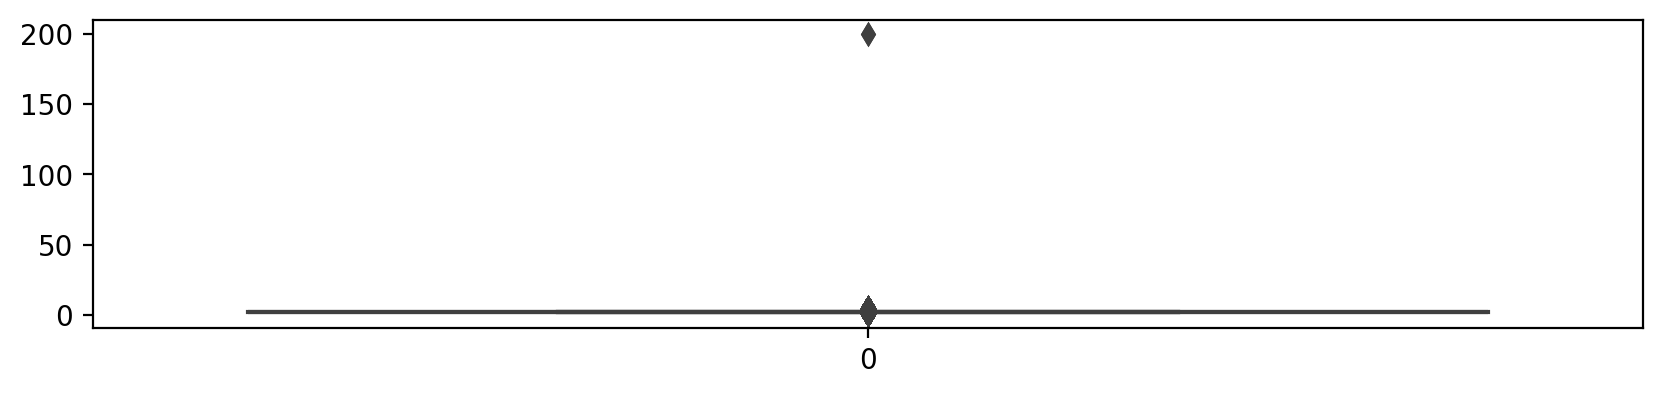

In [44]:
#Checking for outliers in PROD_QTY column using box plot:
plt.figure(figsize=(10,2),dpi=200);
sns.boxplot(trans_df['PROD_QTY']);

In [45]:
#Checking for outliers in PROD_QTY column using outliers function:
outliers(trans_df['PROD_QTY'])

(2.0, 2.0)

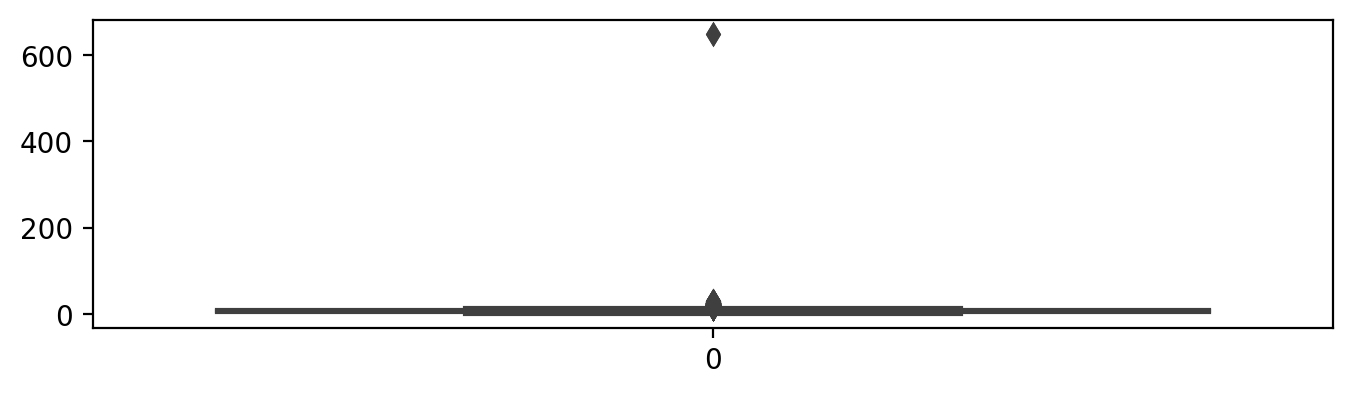

In [46]:
#Checking for outliers in TOT_SALES column using Box plot:
plt.figure(figsize=(8,2),dpi=200);
sns.boxplot(trans_df['TOT_SALES']);

In [47]:
#Checking for outliers in TOT_SALES column using outliers function:
outliers(trans_df['TOT_SALES'])

(-0.29999999999999805, 14.899999999999999)

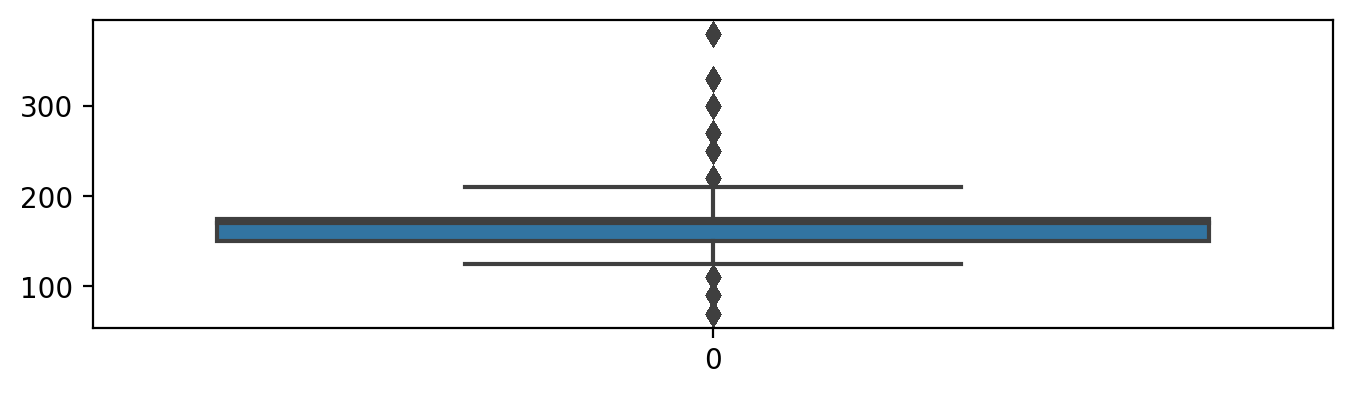

In [48]:
#Checking for outliers in PACKET_SIZE column using Box plot:
plt.figure(figsize=(8,2),dpi=200);
sns.boxplot(trans_df['PACKET_SIZE']);

In [49]:
#Checking for outliers in PACKET_SIZE column using outliers function:
outliers(trans_df['PACKET_SIZE'])

(112.5, 212.5)

In [50]:
#Counting Total Number of Outliers in each Numeric Columns: PROD_QTY,TOT_SALES,PACKET_SIZE
outliers_PROD_Qty = len(trans_df[trans_df['PROD_QTY']>2])
outliers_TOT_SALES = len(trans_df[trans_df["TOT_SALES"] >15])
outliers_PACKET_SIZE = len(trans_df[(trans_df["PACKET_SIZE"] >212.5) | (trans_df["PACKET_SIZE"] <112.5)])

In [51]:
print(f"Count of Outliers in PROD_QTY Column =  {outliers_PROD_Qty}")
print(f"Count of Outliers in TOT_SALES Column =  {outliers_TOT_SALES}")
print(f"Count of Outliers in PACKET_SIZE Column =  {outliers_PACKET_SIZE}")

Count of Outliers in PROD_QTY Column =  1279
Count of Outliers in TOT_SALES Column =  540
Count of Outliers in PACKET_SIZE Column =  72044


In [52]:
# Removing outliers from Numeric Columns: PROD_QTY,TOT_SALES,PACKET_SIZE
trans_df = trans_df[trans_df["PROD_QTY"] <=2]
trans_df = trans_df[trans_df["TOT_SALES"] <=15]
trans_df = trans_df[(trans_df["PACKET_SIZE"] <=212.5) & (trans_df["PACKET_SIZE"] >=112.5)]

### Observations:

1. Total no of rows after removing outliers 191857.
2. Data is cleaned and ready for further analysis.

### Merging the Transaction And PurchaseBehaviour Dataset

In [53]:
df = trans_df.merge(purchasebehav_df,on='LYLTY_CARD_NBR',how='inner')

In [54]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day,LIFESTAGE,CUSTOMER_SEG
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0,175,Natural,2018,October,17,Wednesday,Young Singles/Couples,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,170,Smiths,2019,May,20,Monday,Midage Singles/Couples,Budget
2,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain,2019,May,16,Thursday,Midage Singles/Couples,Budget
3,2018-11-30,4,4196,3537,93,Doritos Corn Chips Southern Chicken 150g,2,7.8,150,Doritos,2018,November,30,Friday,Midage Singles/Couples,Budget
4,2019-01-14,4,4196,3538,60,Kettle Tortilla Chipss Feta&Garlic 150g,2,9.2,150,Kettle,2019,January,14,Monday,Midage Singles/Couples,Budget


In [55]:
df.to_csv("Integrated.csv")

# Exploratory Data Analysis

In [56]:
df.describe()

,DATE,PROD_QTY,TOT_SALES,PACKET_SIZE
count,191857,191857.000000,191857.000000,191857.000000
mean,2018-12-29 23:41:16.863496960,1.894244,6.913586,163.465519
min,2018-07-01 00:00:00,1.000000,1.700000,125.000000
25%,2018-09-30 00:00:00,2.000000,5.400000,150.000000
50%,2018-12-30 00:00:00,2.000000,7.200000,170.000000
75%,2019-03-31 00:00:00,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,2.000000,10.800000,210.000000
std,NaN,0.307526,2.182373,18.536655


### Quantity sold throughout the year

In [57]:
date_sales = pd.DataFrame(df.groupby(["Transaction_year","Transaction_month"]).agg({'TOT_SALES':'sum'}))
date_sales

TOT_SALES
Transaction_year Transaction_month           
2018             August              102459.3
                 December            115518.1
                 July                115380.8
                 November            111696.8
                 October             113560.4
                 September           111573.6
2019             April               111017.2
                 February            103798.4
                 January             112333.1
                 June                111375.9
                 March               116106.7
                 May                 101599.5

### Observation
1. The sales increased during December, possibly due to people stocking up for Christmas.
2. There were also dips in sales around August and May.
3. Zooming in on December, an increasing sales trend was seen coming up towards Christmas, which then dropped to 0 as the supermarket was closed on the Christmas holiday.

### Quantity sold by Packet Size

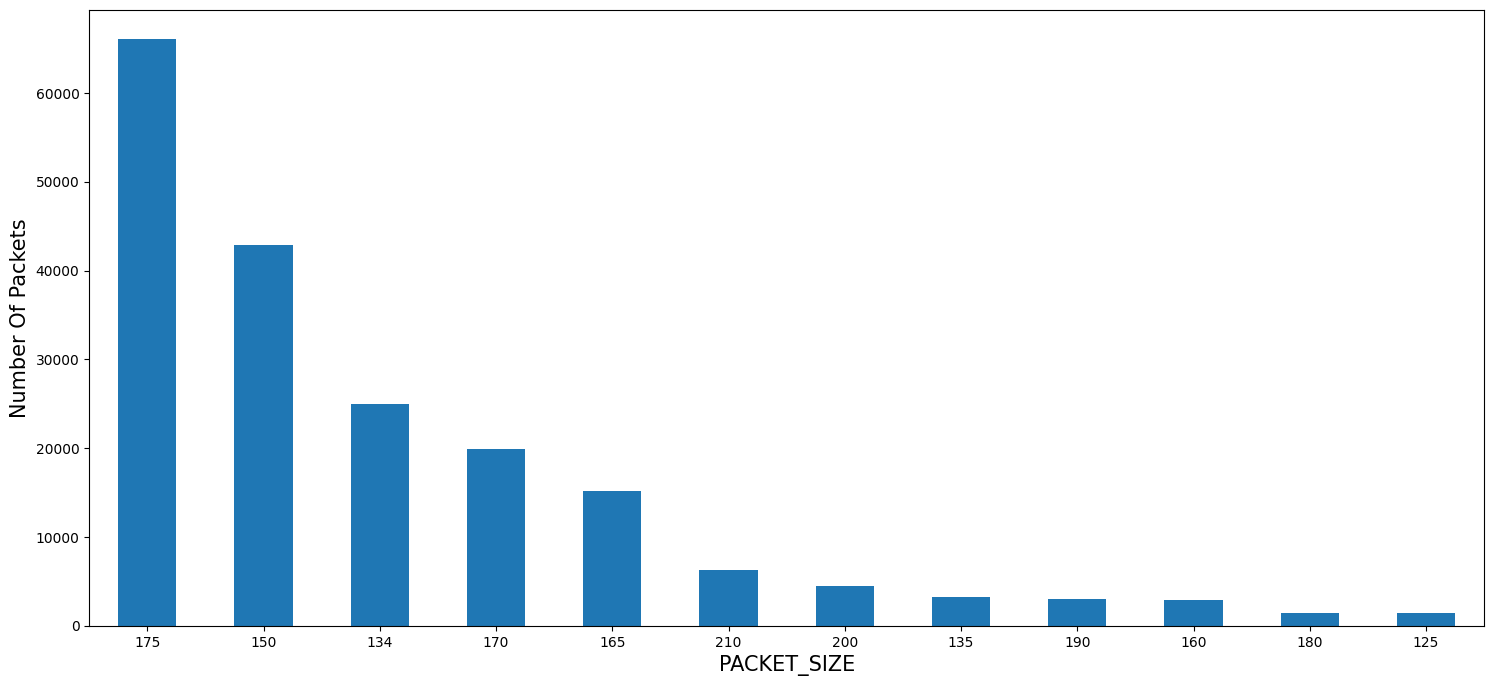

In [58]:
plt.xlabel('Packet Size',{'fontsize':15})
plt.ylabel('Number Of Packets',{'fontsize':15})
df.PACKET_SIZE.value_counts().plot(kind='bar',figsize=(18,8))
plt.xticks(rotation='horizontal')
plt.show()

#### Observation: Most of the purchased products are with pack size of 175.

### Quantities Sold by BRAND

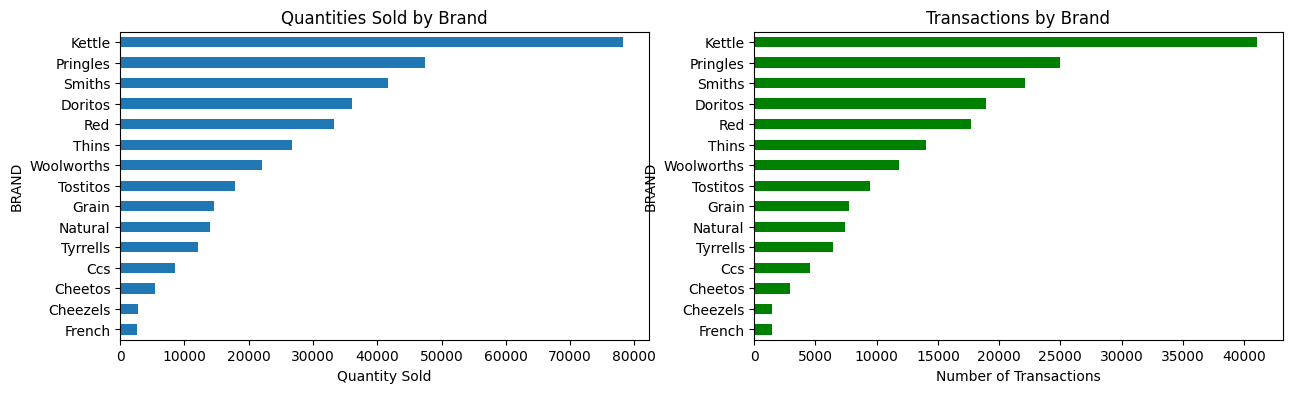

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# Product quantity sales by brand
ax1=plt.subplot(121)
df.groupby(['BRAND'], as_index=False).agg({'PROD_QTY': 'sum'}).sort_values('PROD_QTY').plot.barh(x='BRAND',legend=False, ax=ax1)

ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('BRAND')
ax1.set_title('Quantities Sold by Brand')

ax2=plt.subplot(122)
df.BRAND.value_counts().sort_values().plot.barh(x='BRAND',color='Green', legend=False, ax=ax2)
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('BRAND')
ax2.set_title('Transactions by Brand')

plt.show()

#### Observation: Maximum number of quantity sold and transactions is for brand Kettle.

### Customer Division

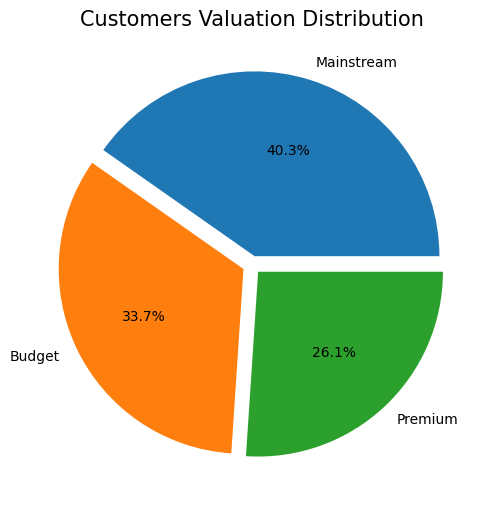

In [60]:
#Distribution of Customers as per Customer Segment
plt.figure(figsize=(6,6))
plt.title('Customers Valuation Distribution',{'fontsize': 15})
explode = (0.05,0.05,0.05)
plt.pie(purchasebehav_df.CUSTOMER_SEG.value_counts(),labels=df.CUSTOMER_SEG.value_counts().index,autopct='%1.1f%%',explode=explode)
plt.show()

#### Observation : The customer classes are quite evenly split, with more Mainstreams followed by Budget customers.

### Customer Lifestage Counts

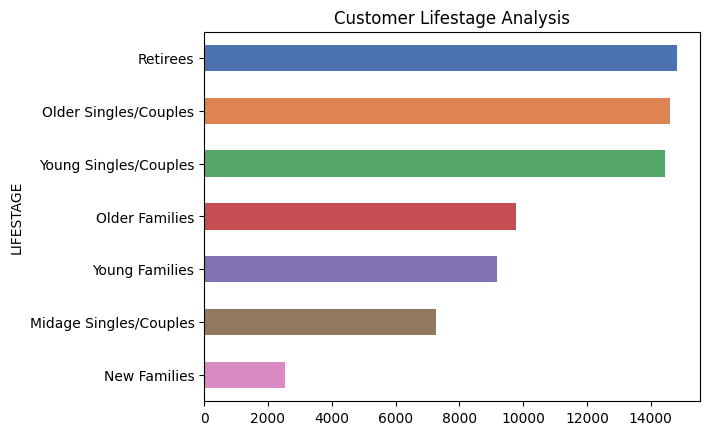

In [61]:
purchasebehav_df.LIFESTAGE.value_counts().plot(kind='barh', color=sns.color_palette("deep"),
title='Customer Lifestage Analysis').invert_yaxis()

#### Observation : Retirees, older and younger singles and couples are the majority of the customer pool.

### Data analysis on customer segments

Analysing customers segments who spends the most on chips (total sales), 
describing customers by lifestage and how premium their general purchasing behaviour is.

### Total Sales and Quantity sold

In [62]:
# Sum up for LIFESTAGE and CUSTOMER_SEG group 
Premium_Lifestyle = df.groupby(['LIFESTAGE','CUSTOMER_SEG']).agg({'TOT_SALES':'sum','PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index().sort_values('TOT_SALES', ascending = False) 

Premium_Lifestyle

,LIFESTAGE,CUSTOMER_SEG,TOT_SALES,PROD_QTY,TXN_ID
6,Older Families,Budget,115969.9,32669,16900
13,Retirees,Mainstream,106898.3,29095,15513
19,Young Singles/Couples,Mainstream,104602.4,26942,14626
15,Young Families,Budget,96506.7,26997,13991
9,Older Singles/Couples,Budget,93556.0,25232,13236
10,Older Singles/Couples,Mainstream,92211.1,25365,13347
11,Older Singles/Couples,Premium,90386.2,24379,12823
12,Retirees,Budget,77321.5,20632,10969
7,Older Families,Mainstream,71731.4,20205,10433
14,Retirees,Premium,66045.7,17665,9338


#### Total Sales by Customer Segment

In [63]:
pd.pivot_table(df, values='TOT_SALES', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum, margins=True,margins_name='Total')


CUSTOMER_SEG,Budget,Mainstream,Premium,Total
LIFESTAGE,,,,
Midage Singles/Couples,24651.1,60572.4,40498.9,125722.4
New Families,15086.5,11800.0,7946.7,34833.2
Older Families,115969.9,71731.4,55999.5,243700.8
Older Singles/Couples,93556.0,92211.1,90386.2,276153.3
Retirees,77321.5,106898.3,66045.7,250265.5
Young Families,96506.7,64235.3,58359.1,219101.1
Young Singles/Couples,43110.5,104602.4,28930.6,176643.5
Total,466202.2,512050.9,348166.7,1326419.8


<Axes: ylabel='LIFESTAGE'>

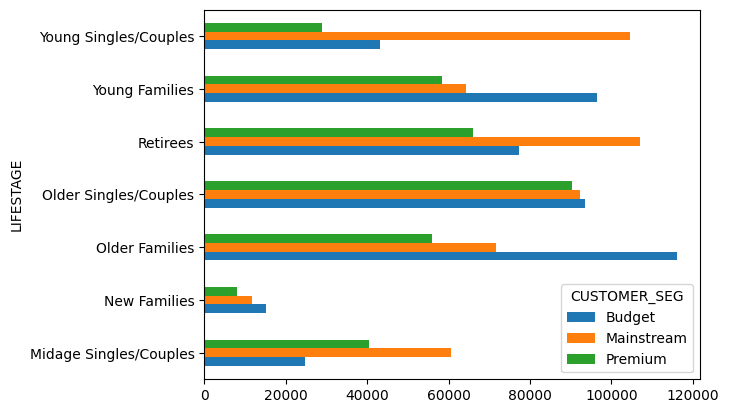

In [64]:
pd.pivot_table(df, values='TOT_SALES', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot( kind='barh')

### Observation

It can be seen that Budget Older Families, Mainstream Young Singles/Couples and Mainstream Retirees contribute the 
most to chip sales and quantities sold. However, this could be due to some segments having more customers who purchase chips. 
A better way is to compute the sales by each customer.

### Total Sales Per Customer and Per Unique Customer

In [65]:
# Number of unique customers in each group
Premium_Lifestyle_Customers = df[['LYLTY_CARD_NBR','LIFESTAGE','CUSTOMER_SEG']].drop_duplicates('LYLTY_CARD_NBR').reset_index(drop=True).groupby(['LIFESTAGE','CUSTOMER_SEG']).size().reset_index(name='Count').sort_values('Count').merge(Premium_Lifestyle, on=['LIFESTAGE','CUSTOMER_SEG'])
Premium_Lifestyle_Customers

,LIFESTAGE,CUSTOMER_SEG,Count,TOT_SALES,PROD_QTY,TXN_ID
0,New Families,Premium,530,7946.7,2153,1160
1,New Families,Mainstream,755,11800.0,3139,1701
2,New Families,Budget,990,15086.5,4007,2169
3,Midage Singles/Couples,Budget,1371,24651.1,6901,3676
4,Older Families,Premium,2103,55999.5,15872,8216
5,Midage Singles/Couples,Premium,2199,40498.9,11250,5990
6,Young Singles/Couples,Premium,2238,28930.6,8232,4602
7,Young Families,Premium,2251,58359.1,16309,8480
8,Young Families,Mainstream,2539,64235.3,18141,9424
9,Older Families,Mainstream,2626,71731.4,20205,10433


In [66]:
Premium_Lifestyle_Customers['SALES_PER_Customer'] = Premium_Lifestyle_Customers['TOT_SALES']/Premium_Lifestyle_Customers['TXN_ID']
Premium_Lifestyle_Customers['SALES_PER_Unique_Customer'] = Premium_Lifestyle_Customers['TOT_SALES']/Premium_Lifestyle_Customers['Count']
Premium_Lifestyle_Customers = Premium_Lifestyle_Customers.sort_values('SALES_PER_Customer')

Premium_Lifestyle_Customers

,LIFESTAGE,CUSTOMER_SEG,Count,TOT_SALES,PROD_QTY,TXN_ID,SALES_PER_Customer,SALES_PER_Unique_Customer
11,Young Singles/Couples,Budget,3343,43110.5,12284,6865,6.279752,12.895752
6,Young Singles/Couples,Premium,2238,28930.6,8232,4602,6.286528,12.926988
3,Midage Singles/Couples,Budget,1371,24651.1,6901,3676,6.705958,17.980379
5,Midage Singles/Couples,Premium,2199,40498.9,11250,5990,6.761085,18.416962
4,Older Families,Premium,2103,55999.5,15872,8216,6.815908,26.628388
8,Young Families,Mainstream,2539,64235.3,18141,9424,6.816140,25.299449
0,New Families,Premium,530,7946.7,2153,1160,6.850603,14.993774
15,Older Families,Budget,4331,115969.9,32669,16900,6.862124,26.776703
9,Older Families,Mainstream,2626,71731.4,20205,10433,6.875434,27.315842
7,Young Families,Premium,2251,58359.1,16309,8480,6.881969,25.925855


<Axes: ylabel='LIFESTAGE'>

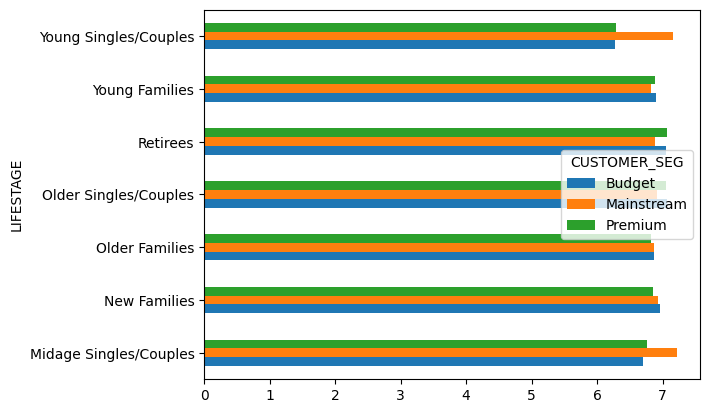

In [67]:
## Sales by each Segment per Customer and per Unique Customer
# Sales per customer
pd.pivot_table(Premium_Lifestyle_Customers, values='SALES_PER_Customer', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')

<Axes: ylabel='LIFESTAGE'>

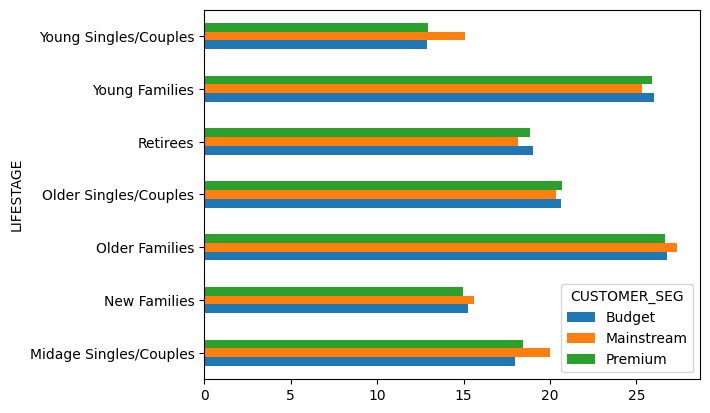

In [68]:
#Sales per Unique customer
pd.pivot_table(Premium_Lifestyle_Customers, values='SALES_PER_Unique_Customer', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')

#### Observations

1. The Sales Per Unique Customer plot has a higher sales per segment and this is because their are multiple customers who made multiple transactions in the given year.
2. It seems that Older and Young Families pay the most for chips in the given year.

### Total Quantity Purchased Per Customer and Per Unique Customer

In [69]:
Premium_Lifestyle_Customers['QTY_PER_CUSTOMER'] =Premium_Lifestyle_Customers['PROD_QTY']/Premium_Lifestyle_Customers['TXN_ID']
Premium_Lifestyle_Customers['QTY_PER_UNIQUE_CUSTOMER'] = Premium_Lifestyle_Customers['PROD_QTY']/Premium_Lifestyle_Customers['Count']
Premium_Lifestyle_Customers = Premium_Lifestyle_Customers.sort_values('QTY_PER_CUSTOMER')
Premium_Lifestyle_Customers

,LIFESTAGE,CUSTOMER_SEG,Count,TOT_SALES,PROD_QTY,TXN_ID,SALES_PER_Customer,SALES_PER_Unique_Customer,QTY_PER_CUSTOMER,QTY_PER_UNIQUE_CUSTOMER
6,Young Singles/Couples,Premium,2238,28930.6,8232,4602,6.286528,12.926988,1.788787,3.678284
11,Young Singles/Couples,Budget,3343,43110.5,12284,6865,6.279752,12.895752,1.789366,3.674544
20,Young Singles/Couples,Mainstream,6945,104602.4,26942,14626,7.151812,15.061541,1.842062,3.879338
1,New Families,Mainstream,755,11800.0,3139,1701,6.937096,15.629139,1.845385,4.157616
2,New Families,Budget,990,15086.5,4007,2169,6.955509,15.238889,1.847395,4.047475
0,New Families,Premium,530,7946.7,2153,1160,6.850603,14.993774,1.856034,4.062264
19,Retirees,Mainstream,5886,106898.3,29095,15513,6.890885,18.161451,1.875524,4.943085
3,Midage Singles/Couples,Budget,1371,24651.1,6901,3676,6.705958,17.980379,1.877312,5.033552
5,Midage Singles/Couples,Premium,2199,40498.9,11250,5990,6.761085,18.416962,1.878130,5.115962
14,Retirees,Budget,4064,77321.5,20632,10969,7.049093,19.025960,1.880937,5.076772


<Axes: ylabel='LIFESTAGE'>

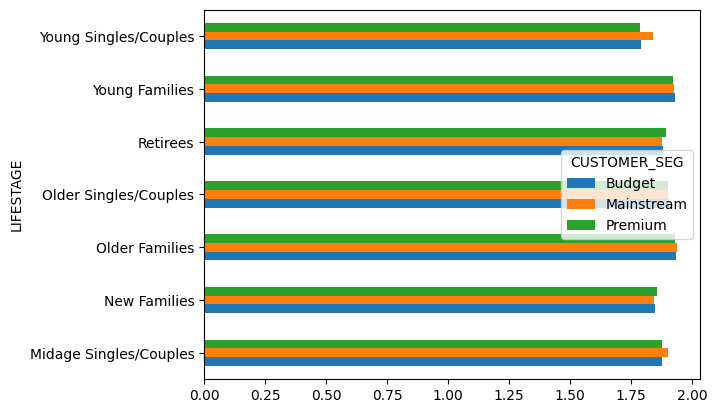

In [70]:
## Quantity Per Customer
pd.pivot_table(Premium_Lifestyle_Customers, values='QTY_PER_CUSTOMER', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')

<Axes: ylabel='LIFESTAGE'>

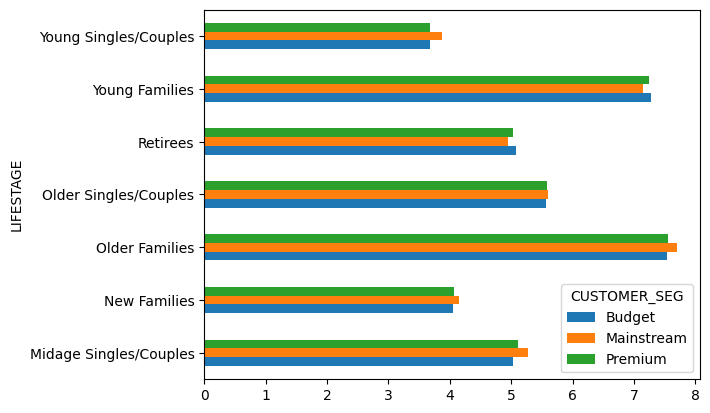

In [71]:
## Sales Per Unique Customer
pd.pivot_table(Premium_Lifestyle_Customers, values='QTY_PER_UNIQUE_CUSTOMER', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')

#### Observations:
    

For quantities sold, the same pattern appears. Older Families and Young Families purchased the most chips in the given year.

### Number of Unique Customers in Each Segment

<Axes: ylabel='LIFESTAGE'>

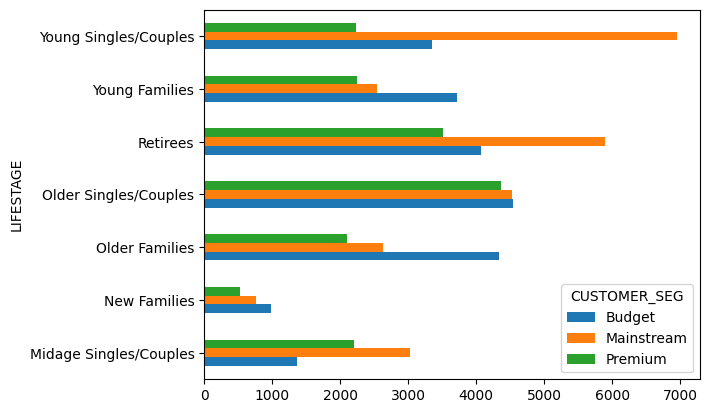

In [72]:
pd.pivot_table(Premium_Lifestyle_Customers, values='Count', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')


### Observations

1. Mainstream Young Singles/Couples and Mainstream Retirees have a lot more customers, which might explain their higher sales, while Budget Retirees do not have as large a customer base, which might explain why the above Per Unique Customer results.

2. It can be concluded that there are more Mainstream Young Singles/Couples and Mainstream Retirees, which lead to more sales by this segments, although each of the customers in these segments do not spend the highest total in a year on chips. On the other hand, while there are not as many Budget Older Families, each of the customers in this segment tend to purchase more chips, leading to high total sales.

### Average Price Per Quantity Per Unique Customer in each Customer Segment

In [73]:
#Price per unit
df['PRICE_PER_UNIT'] = df['TOT_SALES']/df['PROD_QTY'] 
# get price per unit of each customer then groupby lifestage and premium_customer to get average per group
price_per_unit = df.groupby('LYLTY_CARD_NBR').agg({'PRICE_PER_UNIT':'mean'}).reset_index().merge(df[['LYLTY_CARD_NBR','LIFESTAGE','CUSTOMER_SEG']], on='LYLTY_CARD_NBR').groupby(['LIFESTAGE','CUSTOMER_SEG']).agg({'PRICE_PER_UNIT':'mean'}).reset_index().sort_values('PRICE_PER_UNIT')
price_per_unit

,LIFESTAGE,CUSTOMER_SEG,PRICE_PER_UNIT
18,Young Singles/Couples,Budget,3.481253
20,Young Singles/Couples,Premium,3.486810
8,Older Families,Premium,3.526911
16,Young Families,Mainstream,3.541103
6,Older Families,Budget,3.548497
7,Older Families,Mainstream,3.550350
0,Midage Singles/Couples,Budget,3.560732
15,Young Families,Budget,3.573283
17,Young Families,Premium,3.580873
2,Midage Singles/Couples,Premium,3.589833


<Axes: ylabel='LIFESTAGE'>

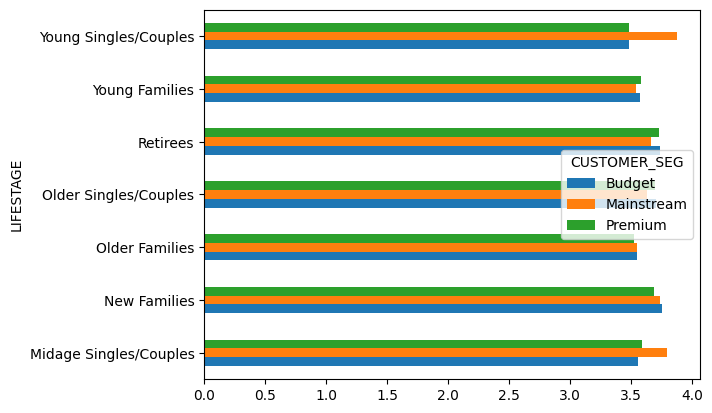

In [74]:
## Average Price Per Quantity Per Unique Customer in each Customer Segment
pd.pivot_table(price_per_unit, values='PRICE_PER_UNIT', index=['LIFESTAGE'], columns=['CUSTOMER_SEG'], aggfunc=np.sum).plot(kind='barh')

### Main Observations Of  EDA:
    

1. Mainstream Young Singles/Couples contributed third most to the total sales, have the largest number of unique customers but tend to purchase lower quantities of chips. Perhaps this group can be further targeted for more advertisements/ recommendations/ promotions on certain brands to encourage more purchase and for purchasing slightly more expensive chip brands.
2. Mainstream Retirees contributed largest to the total sales. However, the number of uniques customers in this segment is less. They tend to purchase more chips and slightly cheaper chips. The general strategy would be the same as that of Mainstream Young Singles/Couples except to promote cheaper brands to them.
3. Meanwhile, Budget Older Families contributed second most to the total sales. They tend to buy lots of chips, but there are not as much of them in the customer base. Therefore, the strategy would be to attract more of this segment to increase the pool size.

The above three strategies might help to drive up total sales and profits.

# Supermarket Product Basket And Affinity Analysis

Here the focus will be on Mainstream Young Singles/Couples and the purchases they made throughout the year to understand their affinity to the brands and product sizes of chips.

#### Reason for choosing Mainstream Young Singles/Couples for Deeper Analysis:

1. Mainstream Young Singles/Couples have the largest unique customer base in the dataset.
2. Mainstream Young Singles/Couples contributed third most to the total sales.
3. Mainstream Young Singles/Couples tend to buy costly chips which is verified by their highest average price per quantity per unique customer in the customer segment.

In [75]:
basket =df[(df['LIFESTAGE']=='Young Singles/Couples') & (df['CUSTOMER_SEG']=='Mainstream')].groupby(['LYLTY_CARD_NBR','BRAND'])['PROD_QTY'].sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
basket


BRAND,Ccs,Cheetos,Cheezels,Doritos,French,Grain,Kettle,Natural,Pringles,Red,Smiths,Thins,Tostitos,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,
100039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,2.0,0.0
100044,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
100047,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0
100057,0.0,0.0,2.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
100079,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [76]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode)
basket_sets

BRAND,Ccs,Cheetos,Cheezels,Doritos,French,Grain,Kettle,Natural,Pringles,Red,Smiths,Thins,Tostitos,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,
100039,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
100044,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1
100047,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
100057,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0
100079,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99236,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
99420,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [77]:
frequent_itemsets = apriori(basket_sets, min_support=0.04, use_colnames=True)
frequent_itemsets

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.226782,(Doritos)
1,0.089561,(Grain)
2,0.440173,(Kettle)
3,0.052844,(Natural)
4,0.291001,(Pringles)
5,0.115911,(Red)
6,0.126134,(Smiths)
7,0.154788,(Thins)
8,0.120518,(Tostitos)
9,0.086537,(Tyrrells)


In [78]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Doritos),(Kettle),0.226782,0.440173,0.077322,0.340952,0.774588,-0.022501,0.849449,-0.273447
1,(Kettle),(Doritos),0.440173,0.226782,0.077322,0.175662,0.774588,-0.022501,0.937987,-0.342027
2,(Doritos),(Pringles),0.226782,0.291001,0.054284,0.239365,0.822558,-0.011710,0.932115,-0.218132
3,(Pringles),(Doritos),0.291001,0.226782,0.054284,0.186541,0.822558,-0.011710,0.950532,-0.233281
4,(Kettle),(Pringles),0.440173,0.291001,0.104104,0.236506,0.812735,-0.023987,0.928625,-0.291574
5,(Pringles),(Kettle),0.291001,0.440173,0.104104,0.357744,0.812735,-0.023987,0.871657,-0.245274
6,(Red),(Kettle),0.115911,0.440173,0.042333,0.365217,0.829714,-0.008688,0.881920,-0.188406
7,(Kettle),(Red),0.440173,0.115911,0.042333,0.096173,0.829714,-0.008688,0.978162,-0.268259
8,(Kettle),(Smiths),0.440173,0.126134,0.047804,0.108603,0.861015,-0.007717,0.980333,-0.223807
9,(Smiths),(Kettle),0.126134,0.440173,0.047804,0.378995,0.861015,-0.007717,0.901486,-0.155918


#### Observation: All the lift values are all close to 1, suggesting that the antecedents of each of the itemsets makes no difference on the chances of purchasing the consequent.

## Affinity to Brand and Size

As a final analysis, we will compute an affinity score for each of the product brand and sizes to see which brand and size Mainstream Young Singles/Couples tend to buy more often.

In [79]:
young_mainstream = df[(df['LIFESTAGE']=='Young Singles/Couples') & (df['CUSTOMER_SEG']=='Mainstream')]
#print(young_mainstream)
quantity_bybrand = young_mainstream.groupby(['BRAND'])[['PROD_QTY']].sum().reset_index()
print(quantity_bybrand)

         BRAND  PROD_QTY
0          Ccs       394
1      Cheetos       288
2     Cheezels       109
3      Doritos      3299
4       French       143
5        Grain      1176
6       Kettle      7094
7      Natural       707
8     Pringles      4292
9          Red      1728
10      Smiths      1883
11       Thins      2179
12    Tostitos      1640
13    Tyrrells      1137
14  Woolworths       873


In [80]:
# quantity_bybrand
quantity_bybrand.PROD_QTY = quantity_bybrand.PROD_QTY / young_mainstream.PROD_QTY.sum()
quantity_bybrand = quantity_bybrand.rename(columns={"PROD_QTY": "Targeted_Segment_Brand"})
quantity_bybrand

,BRAND,Targeted_Segment_Brand
0,Ccs,0.014624
1,Cheetos,0.010690
2,Cheezels,0.004046
3,Doritos,0.122448
4,French,0.005308
5,Grain,0.043649
6,Kettle,0.263306
7,Natural,0.026242
8,Pringles,0.159305
9,Red,0.064138


In [81]:
# Removing young_mainstream
other_segments = pd.concat([df, young_mainstream]).drop_duplicates(keep=False)
other_segments

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day,LIFESTAGE,CUSTOMER_SEG,PRICE_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chips Company Sea Salt 175g,2,6.0,175,Natural,2018,October,17,Wednesday,Young Singles/Couples,Premium,3.00
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chipss Chicken 170g,2,2.9,170,Smiths,2019,May,20,Monday,Midage Singles/Couples,Budget,1.45
2,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain,2019,May,16,Thursday,Midage Singles/Couples,Budget,3.60
3,2018-11-30,4,4196,3537,93,Doritos Corn Chips Southern Chicken 150g,2,7.8,150,Doritos,2018,November,30,Friday,Midage Singles/Couples,Budget,3.90
4,2019-01-14,4,4196,3538,60,Kettle Tortilla Chipss Feta&Garlic 150g,2,9.2,150,Kettle,2019,January,14,Monday,Midage Singles/Couples,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191852,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,2019,March,9,Saturday,Young Singles/Couples,Premium,5.40
191853,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,2018,August,13,Monday,Young Singles/Couples,Premium,4.40
191854,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,2018,November,6,Tuesday,Young Singles/Couples,Premium,4.40
191855,2018-12-27,272,272379,270188,42,Doritos Corn Chips Mexican Jalapeno 150g,2,7.8,150,Doritos,2018,December,27,Thursday,Young Singles/Couples,Premium,3.90


In [82]:
quantity_bybrand_other = other_segments.groupby(['BRAND'])[['PROD_QTY']].sum().reset_index()
quantity_bybrand_other.PROD_QTY = quantity_bybrand_other.PROD_QTY / other_segments.PROD_QTY.sum()
quantity_bybrand_other = quantity_bybrand_other.rename(columns={"PROD_QTY": "Other_Segment_Brand"})

In [83]:
quantity_bybrand = quantity_bybrand.merge(quantity_bybrand_other, on ='BRAND')
quantity_bybrand

,BRAND,Targeted_Segment_Brand,Other_Segment_Brand
0,Ccs,0.014624,0.024120
1,Cheetos,0.010690,0.015314
2,Cheezels,0.004046,0.007718
3,Doritos,0.122448,0.097280
4,French,0.005308,0.007376
5,Grain,0.043649,0.039892
6,Kettle,0.263306,0.211616
7,Natural,0.026242,0.039322
8,Pringles,0.159305,0.128363
9,Red,0.064138,0.093738


In [84]:
quantity_bybrand['Affinitytobrand'] = quantity_bybrand['Targeted_Segment_Brand'] / quantity_bybrand['Other_Segment_Brand']
quantity_bybrand = quantity_bybrand.sort_values('Affinitytobrand')

quantity_bybrand

,BRAND,Targeted_Segment_Brand,Other_Segment_Brand,Affinitytobrand
14,Woolworths,0.032403,0.063159,0.513034
2,Cheezels,0.004046,0.007718,0.524187
10,Smiths,0.069891,0.118104,0.591772
0,Ccs,0.014624,0.024120,0.606298
7,Natural,0.026242,0.039322,0.667358
9,Red,0.064138,0.093738,0.684227
1,Cheetos,0.010690,0.015314,0.698014
4,French,0.005308,0.007376,0.719559
5,Grain,0.043649,0.039892,1.094182
11,Thins,0.080877,0.072756,1.111630


## Affinity to Size

In [85]:
quantity_bysize = young_mainstream.groupby(['PACKET_SIZE'])[['PROD_QTY']].sum().reset_index()
quantity_bysize.PROD_QTY = quantity_bysize.PROD_QTY / young_mainstream.PROD_QTY.sum()
quantity_bysize = quantity_bysize.rename(columns={"PROD_QTY": "Targeted_Segment_Size"})

In [86]:
quantity_bysize_other = other_segments.groupby(['PACKET_SIZE'])[['PROD_QTY']].sum().reset_index()
quantity_bysize_other.PROD_QTY = quantity_bysize_other.PROD_QTY / other_segments.PROD_QTY.sum()
quantity_bysize_other = quantity_bysize_other.rename(columns={"PROD_QTY": "Other_Segment_Size"})

In [87]:
quantity_bysize = quantity_bysize.merge(quantity_bysize_other, on='PACKET_SIZE')
quantity_bysize['Affinitytosize'] = quantity_bysize['Targeted_Segment_Size'] / quantity_bysize['Other_Segment_Size']
quantity_bysize = quantity_bysize.sort_values('Affinitytosize')
quantity_bysize

,PACKET_SIZE,Targeted_Segment_Size,Other_Segment_Size,Affinitytosize
10,200,0.012063,0.023906,0.504595
0,125,0.004046,0.007718,0.524187
4,160,0.008611,0.015713,0.548038
8,180,0.004640,0.007748,0.598826
9,190,0.009947,0.015837,0.628089
5,165,0.074011,0.079431,0.931766
3,150,0.220214,0.224167,0.982367
7,175,0.340880,0.344687,0.988956
6,170,0.107750,0.103515,1.040910
2,135,0.019523,0.016771,1.164147


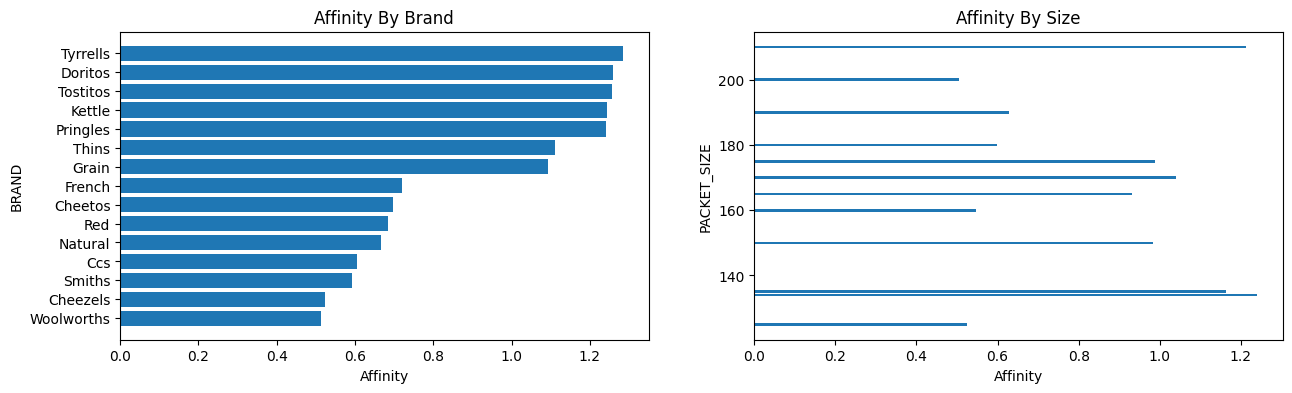

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# Product quantity sales by brand
ax1=plt.subplot(121)

ax1.barh(quantity_bybrand['BRAND'], quantity_bybrand['Affinitytobrand'])

ax1.set_xlabel('Affinity')
ax1.set_ylabel('BRAND')
ax1.set_title('Affinity By Brand')

ax2=plt.subplot(122)
ax2.barh(quantity_bysize['PACKET_SIZE'], quantity_bysize['Affinitytosize'])
ax2.set_xlabel('Affinity')
ax2.set_ylabel('PACKET_SIZE')
ax2.set_title('Affinity By Size')
plt.show()

### Observation: 

The plot shows that Mainstream Young Singles/Couples tend to buy more of Tyrrells, Doritos and Tostitos brand, and prefer product sizes of 134g to 210g. The store can perhaps place more of these products near the shelves that tend to attract Younger and Mainstream customers.

## Conclusion:

1. EDA showed that Kettle and Pringles brand of chips brought in the largest revenue as well as quantities sold.
2. Mainstream Young Singles/Couples contributed to one of the highest sales due to their large customer pool but tend to purchase lower quantity of chips, so advertistments/recommendations/promotions can be targeted towards this group to encourage more purchase.
3. Mainstream Retirees tend to be the same as Mainstream Young Singles/Couples, except that they tend to purchase more chips and slightly cheaper chips. The general strategy would be the same except to promote cheaper brands to them.
4. Budget Older Families also contributed to the most sales, and they tend to buy lots of chips, but there are not as much of them in the customer base. Therefore, the strategy would be to attract more of this segment to increase the pool size.
5. Supermarket Product analysis did not provide any meaningful support/relationship among brands for Mainstream Young Singles/Couples customer purchase behavior.
6. Affinity analysis suggests that Mainstream Young Singles/Couples have affinity towards Tyrrells brand and 134g product size.